# **Abstract**
The healthcare sector suffers a 150 billion dollar yearly loss due to patient no-shows. Every visit missed costs a primary care physician between 150 and 200 dollars in lost income. This is more in line with $500 for surgeons. Patients who miss visits frequently end up needing more expensive emergency care. The cost of healthcare for everyone else takes these increased expenses into account. It is hard to assess the success of any measures to minimize patient no-shows without precise figures that represent baseline data and improvement, thus medical practices should monitor their patient no-show rates. Because no-shows result in lost income for the practice or medical group, having accurate no-show data is particularly crucial. A medical practice's ability to recruit employees, invest in new or extra resources, update technology, and enhance employee pay and benefits depends on its ability to recoup those lost revenues. For instance, if a single-provider practice has an average of two no-shows per day, the lost income (about $104,000 per year) may allow for the hiring of 1-2 full-time employees. The aim of the Notebook is to check the the number of no show appointments. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset 

*   Which independent variables are useful to predict a target (dependent variable)?
*   Which independent variables have missing data? How much
*   Do the training and test sets have the same data?
*   In the predictor variables independent of all the other predictor variables?
*   Which predictor variables are the most important?
*   Do the ranges of the predictor variables make sense?
*   What are the distributions of the predictor variables?

# **Data set**

Data Set:The data set consists of : 


*   13 associated characteristics of appointment no shows - PatientId, AppointmentID, Gender, DataMarcacaoConsulta, DataAgendamento, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received - The Independent Variables
*   The characteristic - No-show is a Dependent Variable.
*   There are a total of 110,527 observations in the dataset.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
#Reading the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KaggleV2-May-2016.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Viewing data
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#checking for missing data
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<Figure size 576x360 with 0 Axes>

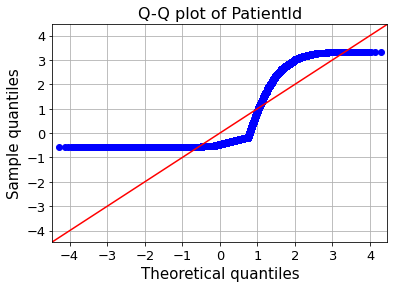

<Figure size 576x360 with 0 Axes>

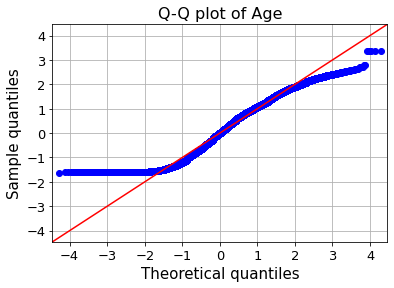

<Figure size 576x360 with 0 Axes>

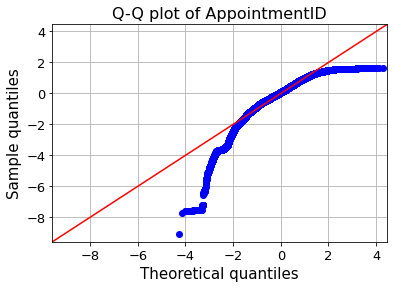

In [6]:
#checking the distribution of numeric variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['PatientId','Age','AppointmentID']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

No     88208
Yes    22319
Name: No-show, dtype: int64

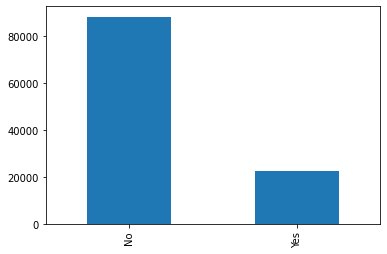

In [7]:
# Count good and bad 
data['No-show'].value_counts().plot.bar()
data['No-show'].value_counts()

In [8]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

0    102584
1      7943
Name: Diabetes, dtype: int64

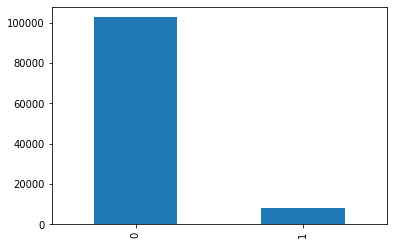

In [9]:
data['Diabetes'].value_counts().plot.bar()
data['Diabetes'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

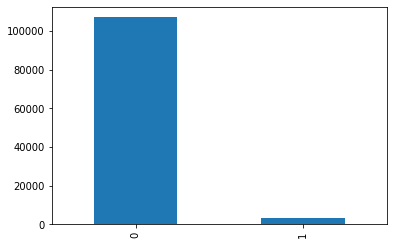

In [10]:
data['Alcoholism'].value_counts().plot.bar()
data['Alcoholism'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

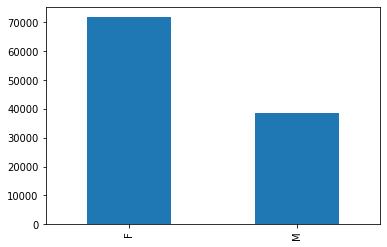

In [11]:
data['Gender'].value_counts().plot.bar()
data['Gender'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

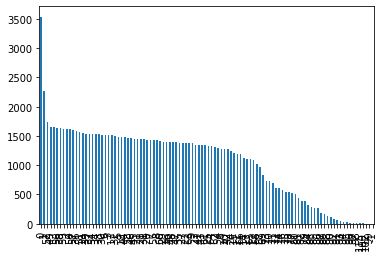

In [12]:
data['Age'].value_counts().plot.bar()
data['Age'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

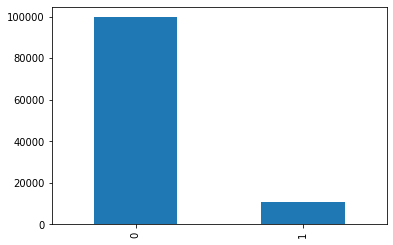

In [13]:
data['Scholarship'].value_counts().plot.bar()
data['Scholarship'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

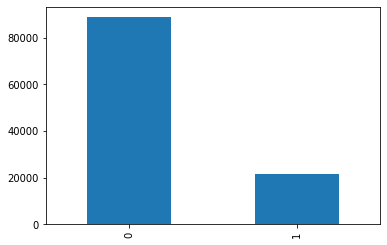

In [14]:
data['Hipertension'].value_counts().plot.bar()
data['Hipertension'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

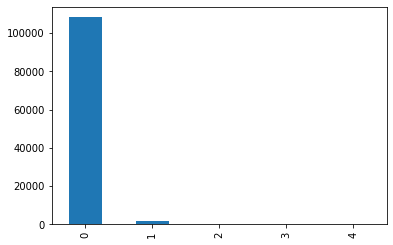

In [15]:
data['Handcap'].value_counts().plot.bar()
data['Handcap'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

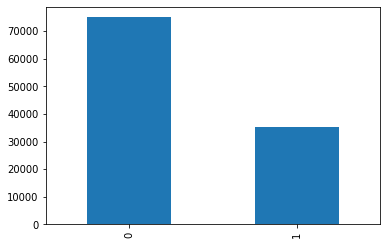

In [16]:
data['SMS_received'].value_counts().plot.bar()
data['SMS_received'].value_counts()

# **Data transforming, Feature creation and Analysis**

**Spelling corrections**

In [17]:
#Correcting some mispelt column names
data.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap',
                       'No-show': 'NoShow'}, inplace = True)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Normalization**

Normalizing 'PatientId' and 'AppointmentID' columns.

In [18]:
# Normalizing the data in the 'PatientId' and 'AppointmentID' column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['PatientId']].values.astype(float)
y = data[['AppointmentID']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['PatientId']] = pd.DataFrame(x_scaled)
data[['AppointmentID']] = pd.DataFrame(x_scaled)
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,0.029873,0.029873,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,0.559008,0.559008,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,0.004263,0.004263,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,0.000868,0.000868,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,0.008841,0.008841,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0.002572,0.002572,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,0.003596,0.003596,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,0.015577,0.015577,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,0.092137,0.092137,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Some feature creation is required.

**Feature Creation**

A column that can be added is the 'WaitingDays' column. The 'WaitingDays' column keeps a count of the number of days a patient has to wait after making a call to schedule an appointment to actually get an appointment. This parameter is determined by taking the difference between 'AppointmentDay' column and 'ScheduledDay' column.

In [19]:
data.ScheduledDay = data.ScheduledDay.apply(np.datetime64)
data.AppointmentDay = data.AppointmentDay.apply(np.datetime64)
data['WaitingDays'] = data['AppointmentDay'].dt.date - data['ScheduledDay'].dt.date
data['WaitingDays'] = data['WaitingDays'].astype(str).str.strip(" days").astype(int)
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitingDays
0,0.029873,0.029873,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,0.559008,0.559008,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,0.004263,0.004263,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,0.000868,0.000868,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,0.008841,0.008841,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,0.095987,0.095987,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,0.733701,0.733701,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,0.003450,0.003450,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,0.056396,0.056396,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,0.078126,0.078126,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


Another column that can be added is the 'HourOfTheDay' column. The 'HourOfTheDay' column indicates the hour at which the appointment was registered. This feature is derived from the 'ScheduledDay' column.

In [20]:
def calculateHour(timestamp):
    timestamp = str(timestamp)
    hour = int(timestamp[11:13])
    minute = int(timestamp[14:16])
    second = int(timestamp[17:])
    return round(hour + minute/60 + second/3600)

data['HourOfTheDay'] = data.ScheduledDay.apply(calculateHour)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitingDays,HourOfTheDay
0,0.029873,0.029873,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,19
1,0.559008,0.559008,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,16
2,0.004263,0.004263,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,16
3,0.000868,0.000868,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,17
4,0.008841,0.008841,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,16


Another column that can be added is the 'DayOfWeek' column. The 'DayOfWeek' column indicates what day of the week the appointment was on. This feature is derived from the 'AppointmentDay' column.

In [21]:
data['DayOfWeek'] = data['AppointmentDay'].apply(lambda x: x.weekday())
data['Weekend'] = 0
data['Weekday'] = 0
data.loc[(data.DayOfWeek>0)&(data.DayOfWeek<4), 'Weekday'] = 1
data.loc[(data.DayOfWeek>=4)&(data.DayOfWeek<7), 'Weekend'] = 1
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitingDays,HourOfTheDay,DayOfWeek,Weekend,Weekday
0,0.029873,0.029873,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,19,4,1,0
1,0.559008,0.559008,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,16,4,1,0
2,0.004263,0.004263,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,16,4,1,0
3,0.000868,0.000868,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,17,4,1,0
4,0.008841,0.008841,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,16,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0.002572,0.002572,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,9,1,0,1
110523,0.003596,0.003596,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,7,1,0,1
110524,0.015577,0.015577,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,16,1,0,1
110525,0.092137,0.092137,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,15,1,0,1


Some of the columns need to be encoded.

**Encoding**

In [22]:
#Target encoding 'NoShow' column
data['NoShow'] = data['NoShow'].replace(['No','Yes'], [0,1])

In [23]:
#Encoding 'Handicap' column
data['Handicap'] = data['Handicap'].replace([0, 1, 2, 3, 4], [0, 1, 1, 1, 1])

In [24]:
#Encoding 'Gender' column
data['Gender'] = data['Gender'].replace(['F','M'], [0, 1])

In [25]:
#Label encoding 'Neighbourhood' column
from sklearn.preprocessing import LabelEncoder
#from sklearn.externals import joblib

encoder_neighbourhood = LabelEncoder()

data['Neighbourhood_enc'] = encoder_neighbourhood.fit_transform(data['Neighbourhood'])

A new column named 'TotalMissed' is added that keeps track of how many appointments a single patient has missed by mapping the 'NoShow' column to 'PatientId'.

In [26]:
data['TotalMissed'] = data.groupby('PatientId')['NoShow'].apply(lambda x: x.cumsum())
data['TotalMissed']

0         0
1         0
2         0
3         0
4         0
         ..
110522    1
110523    1
110524    0
110525    0
110526    0
Name: TotalMissed, Length: 110527, dtype: int64

# Distribution of variables

Check for missing data

In [27]:
#checking for missing data
data.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
WaitingDays          0
HourOfTheDay         0
DayOfWeek            0
Weekend              0
Weekday              0
Neighbourhood_enc    0
TotalMissed          0
dtype: int64

None of the columns have missing data

Check for any erroneous values and NaNs in data.

In [28]:
print('Age:',sorted(data.Age.unique()))
print('Gender:',data.Gender.unique())
print('DayOfWeek:',data.DayOfWeek.unique())
print('Diabetes:',data.Diabetes.unique())
print('Alcoholism:',data.Alcoholism.unique())
print('Hypertension:',data.Hypertension.unique())
print('Handicap:',data.Handicap.unique())
print('Scholarship:',data.Scholarship.unique())
print('SMS_received:',data.SMS_received.unique())
print('HourOfTheDay:', sorted(data.HourOfTheDay.unique()))
print('WaitingDays:',sorted(data.WaitingDays.unique()))
print('TotalMissed:',sorted(data.TotalMissed.unique()))
print('Weekday:',data.Weekday.unique())
print('Weekend:',data.Weekend.unique())
print('Neighbourhood_enc:',data.Neighbourhood_enc.unique())
print('NoShow:',data.NoShow.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: [0 1]
DayOfWeek: [4 1 0 2 3 5]
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1]
Scholarship: [0 1]
SMS_received: [0 1]
HourOfTheDay: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
WaitingDays: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87

# Identify predictor variables

In [29]:
#checking the correlation between all the features in the data
data.corr()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitingDays,HourOfTheDay,DayOfWeek,Weekend,Weekday,Neighbourhood_enc,TotalMissed
PatientId,1.000000,1.000000,0.007890,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.008659,-0.009749,-0.001461,-0.001467,0.002518,-0.001685,0.002588,-0.004224,0.003754,-0.005313
AppointmentID,1.000000,1.000000,0.007890,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.008659,-0.009749,-0.001461,-0.001467,0.002518,-0.001685,0.002588,-0.004224,0.003754,-0.005313
Gender,0.007890,0.007890,1.000000,-0.106440,-0.114293,-0.055718,-0.032554,0.106167,0.022422,-0.046298,-0.004119,-0.028406,-0.000786,0.003916,0.004030,-0.006552,-0.008058,0.009924
Age,-0.004139,-0.004139,-0.106440,1.000000,-0.092457,0.504586,0.292391,0.095811,0.083743,0.012643,-0.060319,0.034820,0.013597,0.003088,-0.000006,0.004828,-0.016358,-0.044322
Scholarship,-0.002880,-0.002880,-0.114293,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.009103,0.001194,0.029135,-0.030421,-0.024278,-0.000673,0.000986,-0.000010,0.006866,0.047664
Hypertension,-0.006441,-0.006441,-0.055718,0.504586,-0.019729,1.000000,0.433086,0.087971,0.084852,-0.006267,-0.035701,-0.017215,-0.033974,0.003455,0.000715,0.003684,0.004323,-0.024063
Diabetes,0.001605,0.001605,-0.032554,0.292391,-0.024894,0.433086,1.000000,0.018474,0.059145,-0.014550,-0.015180,-0.027188,-0.014180,0.006614,0.009311,-0.002817,0.011347,-0.010359
Alcoholism,0.011011,0.011011,0.106167,0.095811,0.035022,0.087971,0.018474,1.000000,0.003692,-0.026147,-0.000196,-0.038519,-0.001642,0.002701,0.004275,-0.004794,-0.000010,0.006367
Handicap,-0.008659,-0.008659,0.022422,0.083743,-0.009103,0.084852,0.059145,0.003692,1.000000,-0.025220,-0.007281,-0.020963,0.001155,0.004571,0.003329,-0.000004,0.009731,0.021774
SMS_received,-0.009749,-0.009749,-0.046298,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.025220,1.000000,0.126431,0.398145,0.061543,-0.089858,-0.097221,0.081662,0.018269,0.048687


**Method 1**

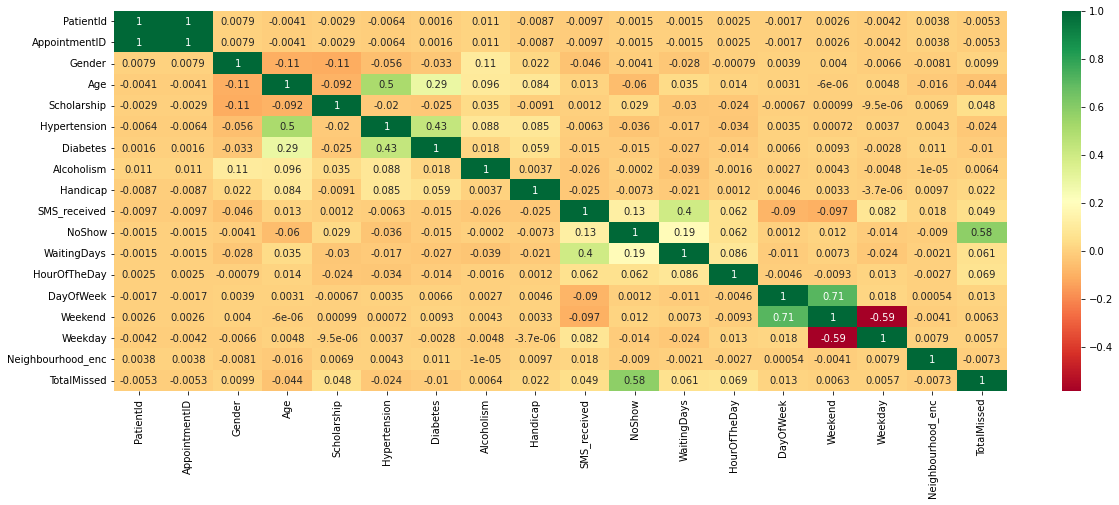

In [30]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

**Method 2**

In [31]:
#Correlation matrix wrt 'NoShow'
corr_tresh = 2 / np.sqrt(data.shape[0])
r = pd.DataFrame(data.corr())
output_r = pd.DataFrame(r.loc[:, "NoShow"].abs())
output_r["correlated"] = output_r > corr_tresh
output_r

,NoShow,correlated
PatientId,0.001461,False
AppointmentID,0.001461,False
Gender,0.004119,False
Age,0.060319,True
Scholarship,0.029135,True
Hypertension,0.035701,True
Diabetes,0.015180,True
Alcoholism,0.000196,False
Handicap,0.007281,True
SMS_received,0.126431,True


**Method 3**

In [32]:
import statsmodels.api as sm

model = sm.OLS(data['NoShow'], data[['PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
                                      'WaitingDays', 'DayOfWeek', 'TotalMissed', 'Neighbourhood_enc', 'Weekend', 'Weekday','HourOfTheDay']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 NoShow   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              7115.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        04:40:24   Log-Likelihood:                         -31070.
No. Observations:              110527   AIC:                                  6.217e+04
Df Residuals:                  110512   BIC:                                  6.231e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PatientId             0.0042      0.002      2.263      0.024       0.001       0.008
AppointmentID         0.0042      0.002      2.263      0.024       0.001       0.008
Age                  -0.0005   4.67e-05    -11.412      0.000      -0.001      -0.000
Scholarship           0.0078      0.003      2.415      0.016       0.001       0.014
Hypertension         -0.0026      0.003     -0.855      0.393      -0.008       0.003
Diabetes              0.0123      0.004      2.946      0.003       0.004       0.020
Alcoholism            0.0153      0.006      2.710      0.007       0.004       0.026
Handicap             -0.0355      0.007     -5.153      0.000      -0.049      -0.022
SMS_received          0.0421      0.002     18.517      0.000       0.038       0.047
WaitingDays           0.0036   6.94e-05     51.165      0.000       0.003       0.004
DayOfWeek            -0.0018      0.002     -1.117      0.264      -0.005       0.001
TotalMissed           0.2834      0.001    235.757      0.000       0.281       0.286
Neighbourhood_enc     0.0001   3.98e-05      2.698      0.007    2.94e-05       0.000
Weekend               0.0218      0.007      3.137      0.002       0.008       0.035
Weekday               0.0017      0.004      0.457      0.648      -0.006       0.009
HourOfTheDay          0.0039      0.000     17.758      0.000       0.003       0.004
==============================================================================
Omnibus:                    12569.444   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127151.177
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                       8.254   Cond. No.                     2.57e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.44e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Considering the significance value of 0.20

* PatientId	has the p-value	0.024, and hence it is a non significant feature.
* AppointmentID	has the p-value	0.024, and hence it is a non significant feature.
* Age	has the p-value	0.000, and hence it is a significant feature.
* Scholarship	has the p-value	0.016, and hence it is a significant feature.
* Hypertension has the p-value	0.393	, and hence it is a non significant feature.
* Diabetes	has the p-value	0.003, and hence it is a significant feature.
* Alcoholism	has the p-value	0.007, and hence it is a significant feature.
* Handicap	has the p-value	0.000, and hence it is a significant feature.
* SMS_received	has the p-value	0.000, and hence it is a significant feature.
* WaitingDays	has the p-value	0.000, and hence it is a significant feature.
* DayOfWeek	has the p-value	0.264, and hence it is a non significant feature.
* TotalMissed	has the p-value	0.000, and hence it is a significant feature.
* Neighbourhood_enc	has the p-value	0.007, and hence it is a significant feature.
* Weekend	has the p-value	0.002, and hence it is a significant feature.
* Weekday	has the p-value	0.648, and hence it is a non significant feature.
* HourOfTheDay	has the p-value	0.000, and hence it is a significant feature.

In [33]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Findind missing data in predictore variables**

In [34]:
#checking for missing data
data.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
WaitingDays          0
HourOfTheDay         0
DayOfWeek            0
Weekend              0
Weekday              0
Neighbourhood_enc    0
TotalMissed          0
dtype: int64

There is no missing data.

# Distribution of Prediction variables

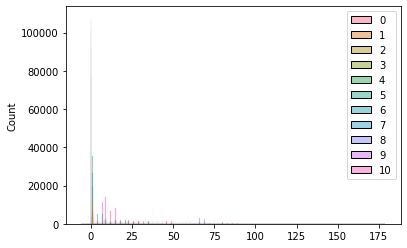

In [35]:
#combined histogram
sns.histplot(np.array(data[['Age', 'Scholarship', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
                                      'WaitingDays', 'TotalMissed', 'Neighbourhood_enc', 'Weekend','HourOfTheDay']]))

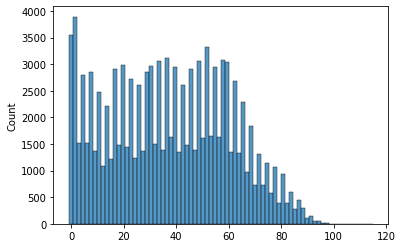

In [36]:
#variable for 'Age'
sns.histplot(np.array(data['Age']))

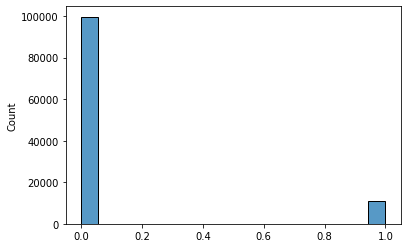

In [37]:
#variable for 'Scholarship'
sns.histplot(np.array(data['Scholarship']))

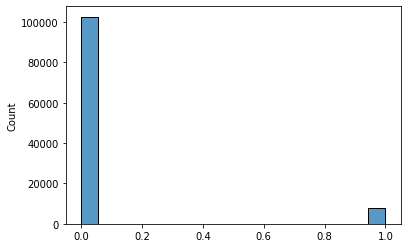

In [38]:
#variable for 'Diabetes'
sns.histplot(np.array(data['Diabetes']))

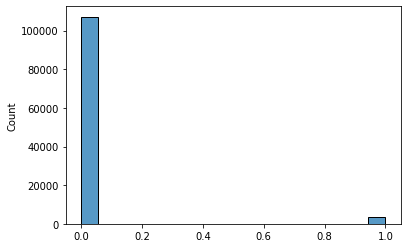

In [39]:
#variable for 'Alcoholism'
sns.histplot(np.array(data['Alcoholism']))

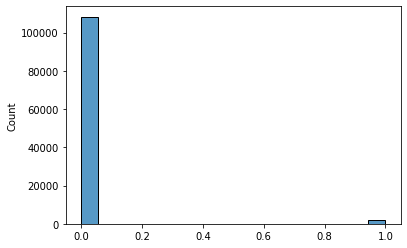

In [40]:
#variable for 'Handicap'
sns.histplot(np.array(data['Handicap']))

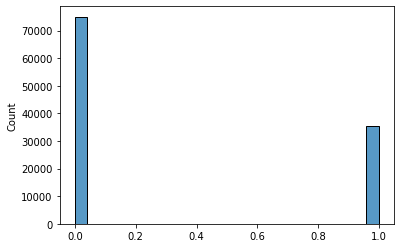

In [41]:
#variable for 'SMS_received'
sns.histplot(np.array(data['SMS_received']))

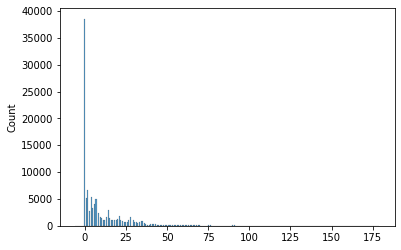

In [42]:
#variable for 'WaitingDays'
sns.histplot(np.array(data['WaitingDays']))

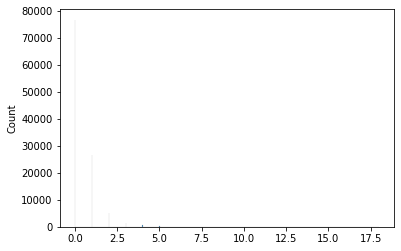

In [43]:
#variable for 'TotalMissed'
sns.histplot(np.array(data['TotalMissed']))

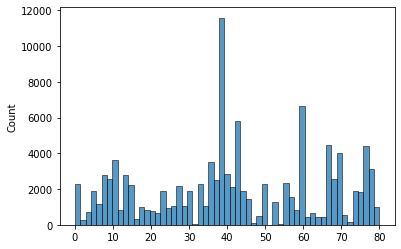

In [44]:
#variable for 'Neighbourhood_enc'
sns.histplot(np.array(data['Neighbourhood_enc']))

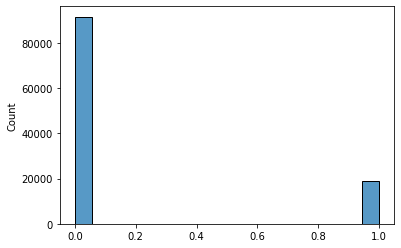

In [45]:
#variable for 'Weekend'
sns.histplot(np.array(data['Weekend']))

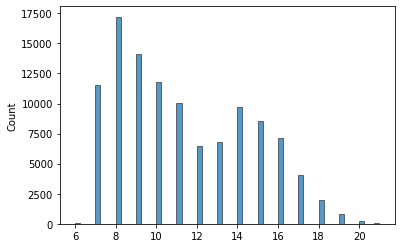

In [46]:
#variable for 'HourOfTheDay'
sns.histplot(np.array(data['HourOfTheDay']))

In [47]:
data.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitingDays,HourOfTheDay,DayOfWeek,Weekend,Weekday,Neighbourhood_enc,TotalMissed
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.147499,0.147499,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.201933,10.183702,11.260063,1.858243,0.172428,0.622056,41.737286,0.415645
std,0.256100,0.256100,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444,15.254996,3.235637,1.371672,0.377754,0.484876,22.361634,0.806458
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004173,0.004173,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,26.000000,0.000000
50%,0.031732,0.031732,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,11.000000,2.000000,0.000000,1.000000,40.000000,0.000000
75%,0.094393,0.094393,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,14.000000,3.000000,0.000000,1.000000,60.000000,1.000000
max,1.000000,1.000000,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,21.000000,5.000000,1.000000,1.000000,80.000000,18.000000


Dropping columns that aren't useful to the prediction or have been modified into new variables

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110527 non-null  float64       
 1   AppointmentID      110527 non-null  float64       
 2   Gender             110527 non-null  int64         
 3   ScheduledDay       110527 non-null  datetime64[ns]
 4   AppointmentDay     110527 non-null  datetime64[ns]
 5   Age                110527 non-null  int64         
 6   Neighbourhood      110527 non-null  object        
 7   Scholarship        110527 non-null  int64         
 8   Hypertension       110527 non-null  int64         
 9   Diabetes           110527 non-null  int64         
 10  Alcoholism         110527 non-null  int64         
 11  Handicap           110527 non-null  int64         
 12  SMS_received       110527 non-null  int64         
 13  NoShow             110527 non-null  int64   

In [49]:
data.drop('PatientId', axis=1,inplace = True)
data.drop('AppointmentID', axis=1,inplace = True)
data.drop('Gender', axis=1,inplace = True)
data.drop(['ScheduledDay'], axis=1, inplace=True)
data.drop(['AppointmentDay'], axis=1, inplace=True)
data.drop('Neighbourhood', axis=1,inplace = True)

In [50]:
data

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitingDays,HourOfTheDay,DayOfWeek,Weekend,Weekday,Neighbourhood_enc,TotalMissed
0,62,0,1,0,0,0,0,0,0,19,4,1,0,39,0
1,56,0,0,0,0,0,0,0,0,16,4,1,0,39,0
2,62,0,0,0,0,0,0,0,0,16,4,1,0,45,0
3,8,0,0,0,0,0,0,0,0,17,4,1,0,54,0
4,56,0,1,1,0,0,0,0,0,16,4,1,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,0,35,9,1,0,1,43,1
110523,51,0,0,0,0,0,1,0,35,7,1,0,1,43,1
110524,21,0,0,0,0,0,1,0,41,16,1,0,1,43,0
110525,38,0,0,0,0,0,1,0,41,15,1,0,1,43,0


# Building the model

In [51]:
X = data.drop(['NoShow'], axis=1)
y = data['NoShow']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.54310345, 0.        , 1.        , ..., 0.        , 0.4875    ,
        0.        ],
       [0.49137931, 0.        , 0.        , ..., 0.        , 0.4875    ,
        0.        ],
       [0.54310345, 0.        , 0.        , ..., 0.        , 0.5625    ,
        0.        ],
       ...,
       [0.18965517, 0.        , 0.        , ..., 1.        , 0.5375    ,
        0.        ],
       [0.3362069 , 0.        , 0.        , ..., 1.        , 0.5375    ,
        0.        ],
       [0.47413793, 0.        , 0.        , ..., 1.        , 0.5375    ,
        0.        ]])

Split the data into test, train and validation sets

In [52]:
from sklearn.model_selection import  train_test_split

X = data[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = data['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

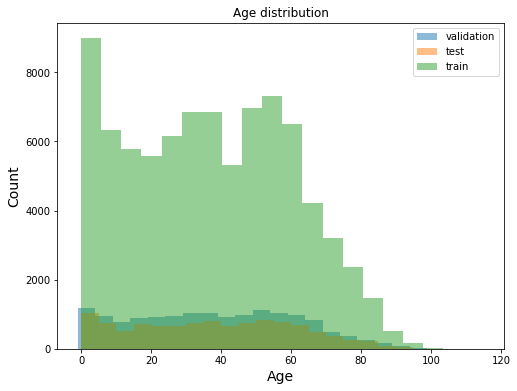

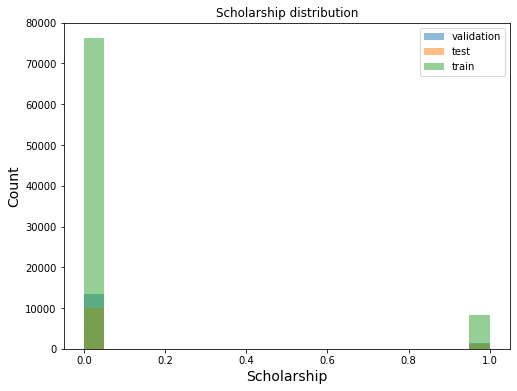

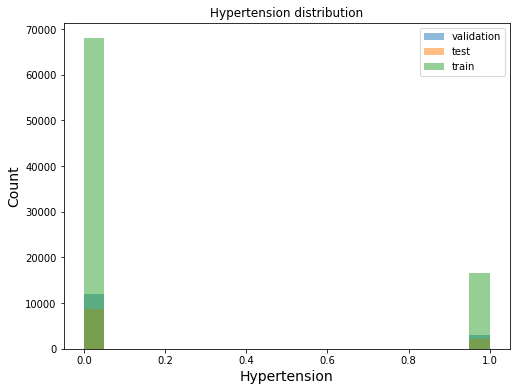

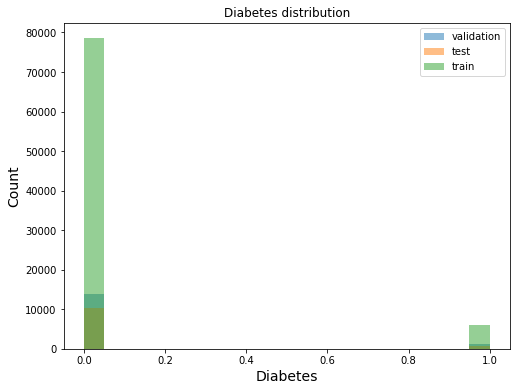

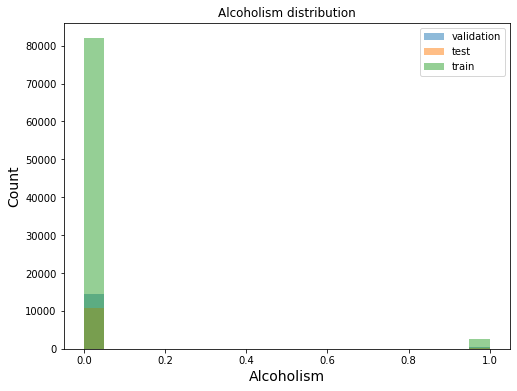

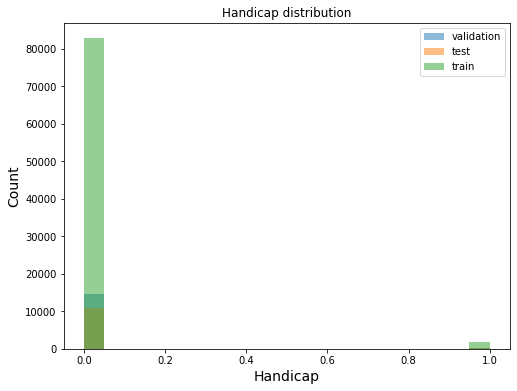

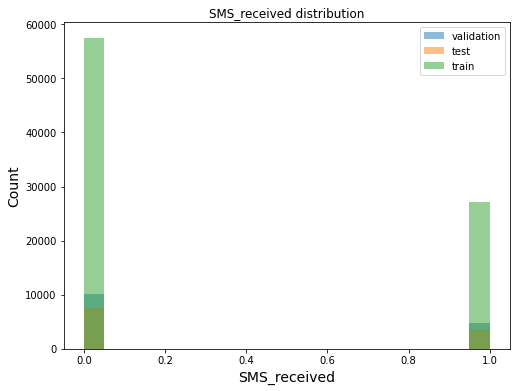

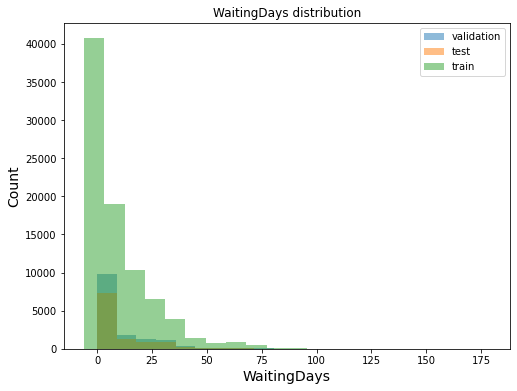

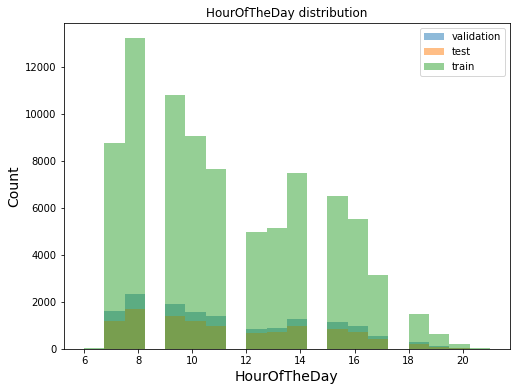

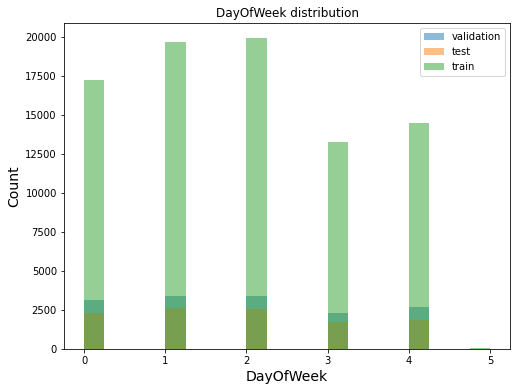

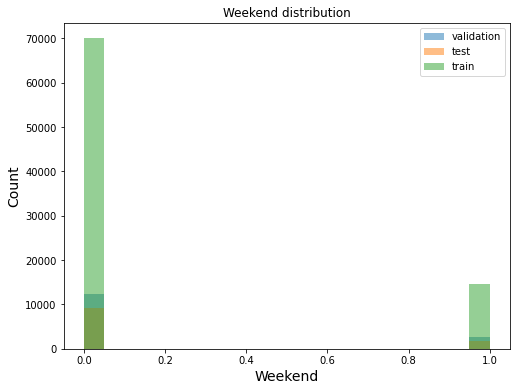

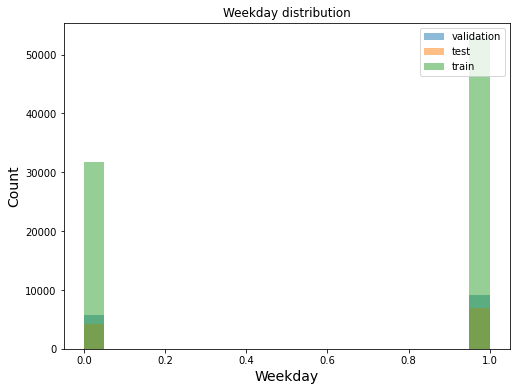

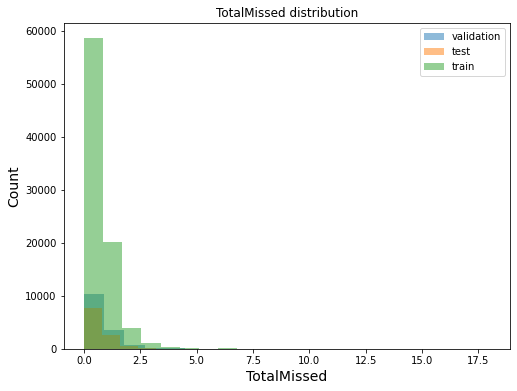

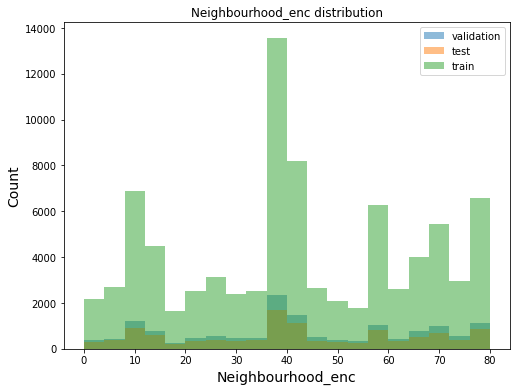

In [53]:
# Looking at the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

**Testing the model**

In [54]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [55]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Mean squared error: 0.14
Coefficient of determination: 0.13
R^2 score on training set = 0.1337799044194382
Confusion matrix is : 
 [[64333  3130]
 [ 8681  8408]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     67463
           1       0.73      0.49      0.59     17089

    accuracy                           0.86     84552
   macro avg       0.80      0.72      0.75     84552
weighted avg       0.85      0.86      0.85     84552



In [57]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [58]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Mean squared error: 0.14
Coefficient of determination: 0.13
R^2 score on test set = 0.12767998978781359
Confusion matrix is : 
 [[8391  422]
 [1136 1104]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      8813
           1       0.72      0.49      0.59      2240

    accuracy                           0.86     11053
   macro avg       0.80      0.72      0.75     11053
weighted avg       0.85      0.86      0.85     11053



In [59]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Mean squared error: 0.14
Coefficient of determination: 0.12
R^2 score on validation set = 0.11538769863115028
Confusion matrix is : 
 [[11348   584]
 [ 1531  1459]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11932
           1       0.71      0.49      0.58      2990

    accuracy                           0.86     14922
   macro avg       0.80      0.72      0.75     14922
weighted avg       0.85      0.86      0.85     14922



The Test and Train data seem to be almost the same considering the Coefficient of determination and R^2 score.

# Understanding the important features

In [60]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['NoShow'], data[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays', 'HourOfTheDay',
       'DayOfWeek', 'Weekend', 'Weekday', 'Neighbourhood_enc', 'TotalMissed']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 NoShow   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              7622.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        04:41:42   Log-Likelihood:                         -31072.
No. Observations:              110527   AIC:                                  6.217e+04
Df Residuals:                  110513   BIC:                                  6.231e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                  -0.0005   4.66e-05    -11.337      0.000      -0.001      -0.000
Scholarship           0.0079      0.003      2.438      0.015       0.002       0.014
Hypertension         -0.0026      0.003     -0.880      0.379      -0.009       0.003
Diabetes              0.0123      0.004      2.954      0.003       0.004       0.020
Alcoholism            0.0155      0.006      2.739      0.006       0.004       0.027
Handicap             -0.0356      0.007     -5.171      0.000      -0.049      -0.022
SMS_received          0.0421      0.002     18.510      0.000       0.038       0.047
WaitingDays           0.0036   6.94e-05     51.184      0.000       0.003       0.004
HourOfTheDay          0.0039      0.000     18.149      0.000       0.003       0.004
DayOfWeek            -0.0018      0.002     -1.125      0.261      -0.005       0.001
Weekend               0.0222      0.007      3.181      0.001       0.009       0.036
Weekday               0.0020      0.004      0.526      0.599      -0.005       0.009
Neighbourhood_enc     0.0001   3.97e-05      2.824      0.005    3.44e-05       0.000
TotalMissed           0.2834      0.001    235.757      0.000       0.281       0.286
==============================================================================
Omnibus:                    12572.262   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127228.985
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                       8.256   Cond. No.                         504.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The most important features for the prediction are '**TotalMissed**', '**WaitingDays**', '**SMS_received**', '**Handicap**', '**HourOfTheDay**' and '**Age**'.

#Remove Outliers

**Ranges of prediction variables**

In [62]:
print('Age:',sorted(data.Age.unique()))
print('Handicap:',data.Handicap.unique())
print('SMS_received:',data.SMS_received.unique())
print('HourOfTheDay:', sorted(data.HourOfTheDay.unique()))
print('WaitingDays:',sorted(data.WaitingDays.unique()))
print('TotalMissed:',sorted(data.TotalMissed.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Handicap: [0 1]
SMS_received: [0 1]
HourOfTheDay: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
WaitingDays: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 1

The 'Age' column has values ranging from -1 to 115. Practically speaking, negative ages aren't possible and ages as high as 115 are rarely possible.The negative value will be removed and maximum age will be cut off at 95.

The 'WaitingDays' column is the number of days between the call made for scheduling an appointment and the actual appointment. There are some negative values, these will be removed.

In [63]:
data = data[(data.Age >= 0) & (data.Age <= 95)]
data = data[(data.WaitingDays >= 0)]
data


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,WaitingDays,HourOfTheDay,DayOfWeek,Weekend,Weekday,Neighbourhood_enc,TotalMissed
0,62,0,1,0,0,0,0,0,0,19,4,1,0,39,0
1,56,0,0,0,0,0,0,0,0,16,4,1,0,39,0
2,62,0,0,0,0,0,0,0,0,16,4,1,0,45,0
3,8,0,0,0,0,0,0,0,0,17,4,1,0,54,0
4,56,0,1,1,0,0,0,0,0,16,4,1,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,0,35,9,1,0,1,43,1
110523,51,0,0,0,0,0,1,0,35,7,1,0,1,43,1
110524,21,0,0,0,0,0,1,0,41,16,1,0,1,43,0
110525,38,0,0,0,0,0,1,0,41,15,1,0,1,43,0


Testing the data after removing outliers

In [64]:
X = data.drop(['NoShow'], axis=1)
y = data['NoShow']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [65]:
import statsmodels.api as sm

model = sm.OLS(data['NoShow'], data[['Age', 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
                                      'WaitingDays', 'DayOfWeek', 'TotalMissed', 'Neighbourhood_enc', 'Weekend', 'Weekday','HourOfTheDay']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 NoShow   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              7618.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        04:41:43   Log-Likelihood:                         -31058.
No. Observations:              110475   AIC:                                  6.214e+04
Df Residuals:                  110461   BIC:                                  6.228e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                  -0.0005   4.67e-05    -11.349      0.000      -0.001      -0.000
Scholarship           0.0079      0.003      2.447      0.014       0.002       0.014
Hypertension         -0.0026      0.003     -0.878      0.380      -0.009       0.003
Diabetes              0.0124      0.004      2.988      0.003       0.004       0.021
Alcoholism            0.0156      0.006      2.748      0.006       0.004       0.027
Handicap             -0.0363      0.007     -5.266      0.000      -0.050      -0.023
SMS_received          0.0422      0.002     18.532      0.000       0.038       0.047
WaitingDays           0.0036   6.94e-05     51.195      0.000       0.003       0.004
DayOfWeek            -0.0017      0.002     -1.113      0.266      -0.005       0.001
TotalMissed           0.2833      0.001    235.655      0.000       0.281       0.286
Neighbourhood_enc     0.0001   3.98e-05      2.826      0.005    3.44e-05       0.000
Weekend               0.0221      0.007      3.177      0.001       0.008       0.036
Weekday               0.0019      0.004      0.501      0.616      -0.005       0.009
HourOfTheDay          0.0039      0.000     18.157      0.000       0.003       0.004
==============================================================================
Omnibus:                    12560.222   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127002.948
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                       8.253   Cond. No.                         503.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
one_hot_features = pd.get_dummies(data.drop(["NoShow"], axis=1)).columns
X = pd.get_dummies(data.drop(["NoShow"], axis=1)).values
y = data.NoShow.values

X = X.astype("float64")
y = y.astype("float64")

In [67]:
from sklearn.model_selection import  train_test_split

X = data[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = data['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

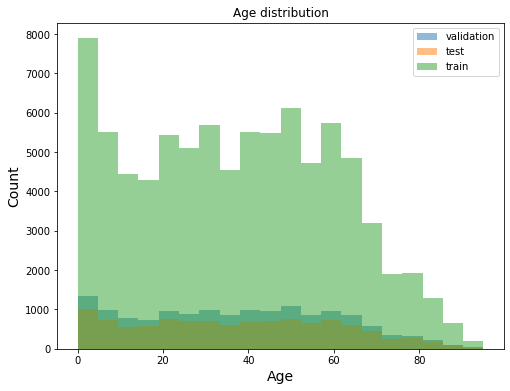

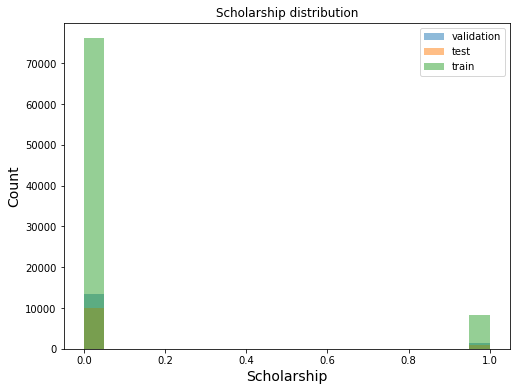

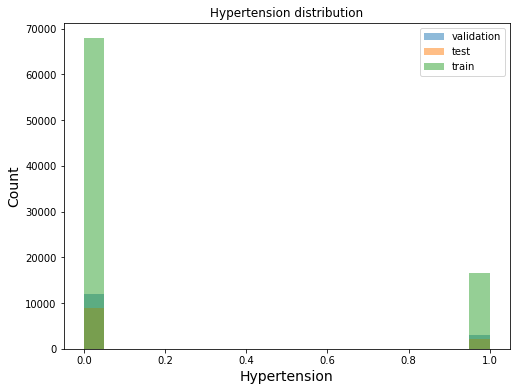

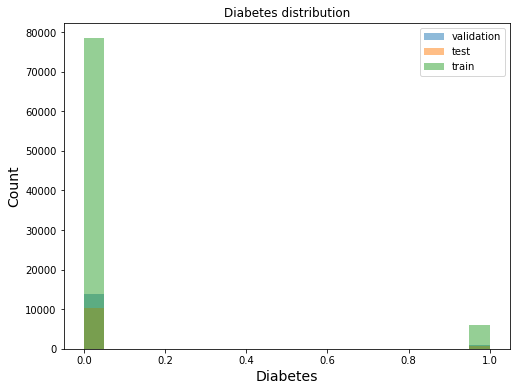

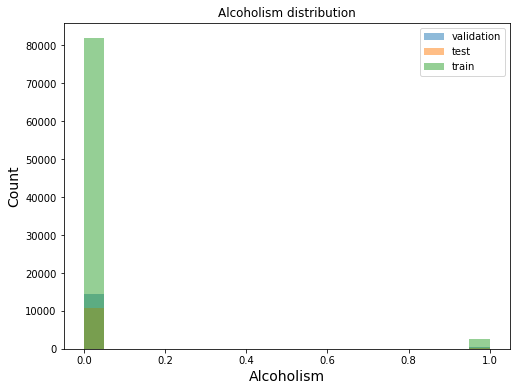

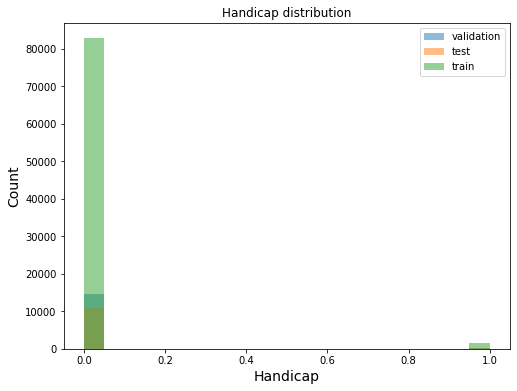

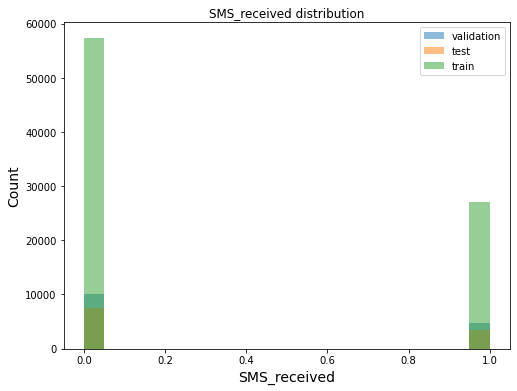

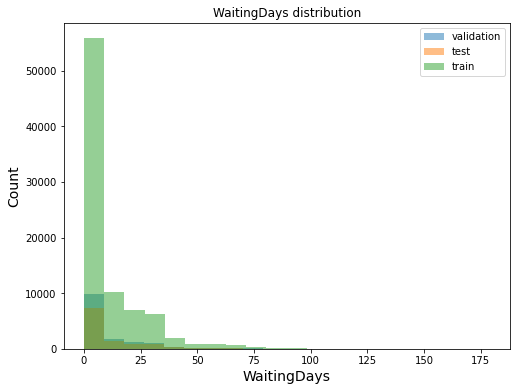

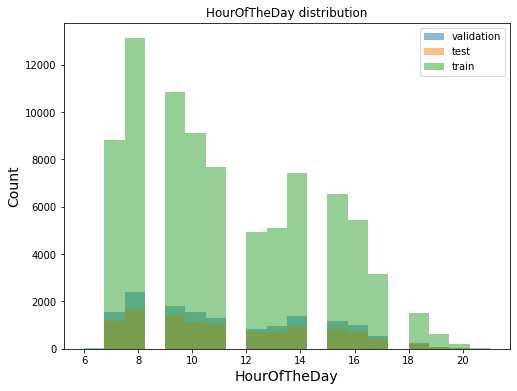

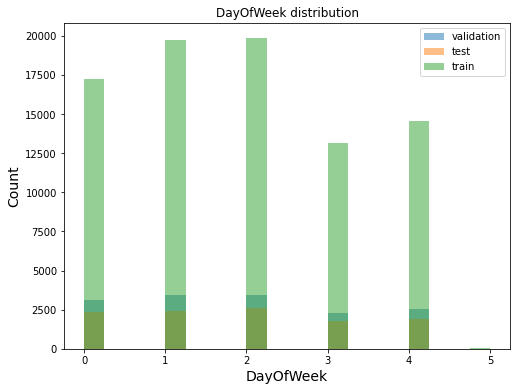

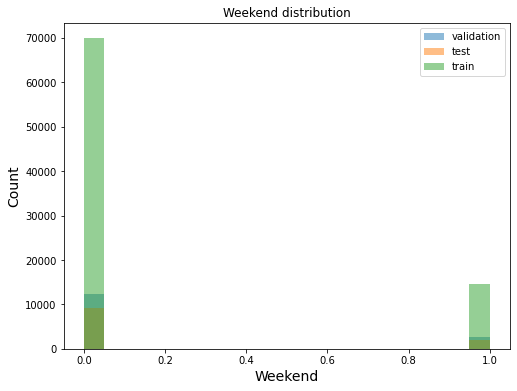

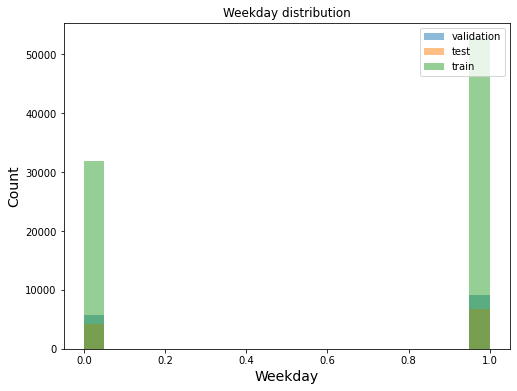

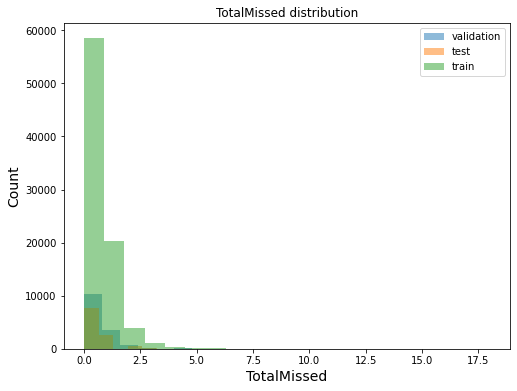

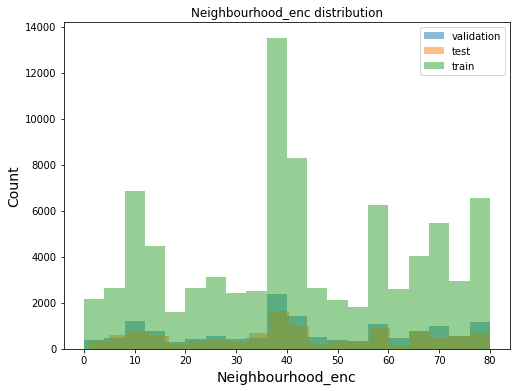

In [68]:
# Looking at the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

**Testing the model**

In [69]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [70]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1210 ± 0.0029,TotalMissed
0.0259 ± 0.0011,WaitingDays
0.0053 ± 0.0011,SMS_received
0.0026 ± 0.0019,Age
0.0001 ± 0.0009,Weekend
-0.0000 ± 0.0001,Alcoholism
-0.0000 ± 0.0001,Handicap
-0.0002 ± 0.0007,Neighbourhood_enc
-0.0002 ± 0.0003,HourOfTheDay
-0.0004 ± 0.0005,Hypertension


In [72]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Mean squared error: 0.14
Coefficient of determination: 0.14
R^2 score on training set = 0.13632983754120453
Confusion matrix is : 
 [[64160  3214]
 [ 8586  8552]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     67374
           1       0.73      0.50      0.59     17138

    accuracy                           0.86     84512
   macro avg       0.80      0.73      0.75     84512
weighted avg       0.85      0.86      0.85     84512



In [73]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Mean squared error: 0.14
Coefficient of determination: 0.13
R^2 score on test set = 0.13322692685564308
Confusion matrix is : 
 [[8432  424]
 [1099 1093]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      8856
           1       0.72      0.50      0.59      2192

    accuracy                           0.86     11048
   macro avg       0.80      0.73      0.75     11048
weighted avg       0.85      0.86      0.85     11048



In [74]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Mean squared error: 0.14
Coefficient of determination: 0.11
R^2 score on validation set = 0.10945016388278173
Confusion matrix is : 
 [[11361   577]
 [ 1545  1432]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11938
           1       0.71      0.48      0.57      2977

    accuracy                           0.86     14915
   macro avg       0.80      0.72      0.74     14915
weighted avg       0.85      0.86      0.85     14915



# Imputation

**10%**

**Remove 10% data**

In [75]:
from itertools import product
from random import sample

p = 0.1
n = int(data.shape[0]*data.shape[1]*p)          #Calculate count of nans

#Sample exactly n indexes
ids = sample(list(product(range(data.shape[0]), range(data.shape[1]))), n)
idx, idy = list(zip(*ids))

datas = data.to_numpy().astype(float)            #Get data as numpy
datas[idx, idy]=np.nan                         #Update numpy view with np.nan

#Assign to new dataframe
data_10 = pd.DataFrame(datas, columns=data.columns, index=data.index)
print(data_10)

         Age  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0       62.0          0.0           1.0       0.0         0.0       NaN   
1       56.0          0.0           0.0       0.0         0.0       0.0   
2       62.0          0.0           0.0       0.0         0.0       0.0   
3        8.0          NaN           0.0       0.0         0.0       0.0   
4       56.0          0.0           NaN       1.0         0.0       0.0   
...      ...          ...           ...       ...         ...       ...   
110522  56.0          0.0           0.0       0.0         0.0       0.0   
110523  51.0          0.0           0.0       0.0         0.0       0.0   
110524  21.0          0.0           0.0       0.0         0.0       0.0   
110525   NaN          0.0           0.0       0.0         0.0       0.0   
110526  54.0          0.0           0.0       0.0         0.0       0.0   

        SMS_received  NoShow  WaitingDays  HourOfTheDay  DayOfWeek  Weekend  \
0                NaN

In [76]:
#checking for missing data
data.isnull().sum()

Age                  0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
WaitingDays          0
HourOfTheDay         0
DayOfWeek            0
Weekend              0
Weekday              0
Neighbourhood_enc    0
TotalMissed          0
dtype: int64

In [77]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**KNN**

In [1]:
from fancyimpute import KNN
imputer = KNN(2) #use 2 nearest rows which have a feature to fill in each row’s missing features
knn_10 = imputer.fit_transform(data_10)
knn_10

NameError: ignored

In [ ]:
from sklearn.model_selection import  train_test_split

X = knn_10[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = knn_10['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

**MEAN**

In [ ]:
mean_10 = data_10.fillna(data_10.mean(numeric_only=True).round(1), inplace=False)
mean_10

In [ ]:
from sklearn.model_selection import  train_test_split

X = mean_10[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = mean_10['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

**MEDIAN**

In [ ]:
median_10 = data_10.fillna(data_10.mean(numeric_only=True).round(1), inplace=False)
median_10

In [ ]:
from sklearn.model_selection import  train_test_split

X = median_10[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = median_10['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# 5%

**Remove 5% of the data**

In [ ]:
from itertools import product
from random import sample

p = 0.05
n = int(data.shape[0]*data.shape[1]*p)          #Calculate count of nans

#Sample exactly n indexes
ids = sample(list(product(range(data.shape[0]), range(data.shape[1]))), n)
idx, idy = list(zip(*ids))

datas = data.to_numpy().astype(float)            #Get data as numpy
datas[idx, idy]=np.nan                         #Update numpy view with np.nan

#Assign to new dataframe
data_5 = pd.DataFrame(datas, columns=data.columns, index=data.index)
print(data_5)

In [ ]:
#checking for missing data
data.isnull().sum()

**KNN**

In [ ]:
from fancyimpute import KNN
imputer = KNN(2) #use 2 nearest rows which have a feature to fill in each row’s missing features
knn_5 = imputer.fit_transform(data_5)
knn_5

In [ ]:
from sklearn.model_selection import  train_test_split

X = knn_5[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = knn_5['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

**MEAN**

In [ ]:
mean_5 = data_5.fillna(data_5.mean(numeric_only=True).round(1), inplace=False)
mean_5

In [ ]:
from sklearn.model_selection import  train_test_split

X = mean_5[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = mean_5['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

**MEDIAN**

In [ ]:
median_5 = data_5.fillna(data_5.mean(numeric_only=True).round(1), inplace=False)
median_5

In [ ]:
from sklearn.model_selection import  train_test_split

X = median_5[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = median_5['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# 1%

**Remove 1% of the data**

In [ ]:
from itertools import product
from random import sample

p = 0.01
n = int(data.shape[0]*data.shape[1]*p)          #Calculate count of nans

#Sample exactly n indexes
ids = sample(list(product(range(data.shape[0]), range(data.shape[1]))), n)
idx, idy = list(zip(*ids))

datas = data.to_numpy().astype(float)            #Get data as numpy
datas[idx, idy]=np.nan                         #Update numpy view with np.nan

#Assign to new dataframe
data_1 = pd.DataFrame(datas, columns=data.columns, index=data.index)
print(data_1)

**KNN**

In [ ]:
from fancyimpute import KNN
imputer = KNN(2) #use 2 nearest rows which have a feature to fill in each row’s missing features
knn_1 = imputer.fit_transform(data_1)
knn_1

In [ ]:
from sklearn.model_selection import  train_test_split

X = knn_1[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = knn_1['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

**MEAN**

In [ ]:
mean_1 = data_1.fillna(data_1.mean(numeric_only=True).round(1), inplace=False)
mean_1

In [ ]:
from sklearn.model_selection import  train_test_split

X = mean_1[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = mean_1['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

**MEDIAN**

In [ ]:
median_1 = data_1.fillna(data_1.mean(numeric_only=True).round(1), inplace=False)
median_1

In [ ]:
from sklearn.model_selection import  train_test_split

X = median_1[ ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

y = median_1['NoShow']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_val_plot = X_val[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

X_train_plot = X_train[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received', 'Distance', 'WaitingDays',
       'HourOfTheDay', 'DayOfWeek', 'Weekend', 'Weekday', 'TotalMissed',
       'Neighbourhood_enc']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

In [ ]:
# Create linear regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print("Confusion matrix is : \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print("Confusion matrix is : \n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Questions

* Which independent variables are useful to predict a target (dependent variable)?

'TotalMissed', 'WaitingDays', 'SMS_received', 'Handicap', 'HourOfTheDay' and 'Age' are useful in the prediction.

* Which independent variable have missing data? How much?

None of the independent variables have missing data.



* Do the training and test sets have the same data?

Yest the Test and Training data are almost the same.



* In the predictor variables independent of all the other predictor variables?


Yes the predictor variables are independent of all other predictor variables.



* Which predictor variables are the most important?


The order of importance of variables are as follows:

TotalMissed

WaitingDays

SMS_received

Age

Weekend

Alcoholism

Handicap

Neighbourhood_enc

HourOfTheDay

Hypertension

Scholarship

Diabetes

DayOfWeek

Weekday





* Do the ranges of the predictor variables make sense?

Some of the predictore variables have some outlier values. These have been taken care off in the notebook. (Age, WaitingDays)

* What are the distributions of the predictor variables?  


  Most of the predictor variables are binary. Age is right skewed and neighbourhood_en is normal distribution.



**Citation**

[1] https://www.kaggle.com/code/dasmehdixtr/no-show-prediction-best-score-96?kernelSessionId=81656383

[2] https://www.kaggle.com/code/brenoarosa/appointment-no-show-analysis-and-prediction

**Lisence**

LICENSE

Copyright <2022> Sonali Mondal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.